<a href="https://colab.research.google.com/github/imanrahman52/Tugas_Pemrograman_Python/blob/main/Tugas_Pemrograman_Python_M_Iman_Rahmanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [58]:
ls

3scene/            nnmodel_scene2/                 Untitled1.ipynb
forest_text63.jpg  Tugas_Pemrograman_Python.ipynb
nnmodel_scene/     Untitled0.ipynb


In [51]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os 

In [24]:
print("[INFO] Loading Gambar...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] Loading Gambar...


In [25]:
for imagePath in imagePaths:
  image = Image.open(imagePath)
  image = np.array(image.resize((64, 64))) / 255.0
  data.append(image)
  label = imagePath.split(os.path.sep)[-2]  
  labels.append(label)

In [26]:
print(labels)

['coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 

In [27]:
lb = LabelBinarizer()
labels  = lb.fit_transform(labels)

In [28]:
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [29]:
(trainX, testX, trainY,  testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(711, 64, 64, 3)
(237, 64, 64, 3)


In [30]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation="softmax", name="layer4"),
    ]
)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [32]:
print("[INFO] Training Network ....")
opt = Adam(lr=1e-3, decay=1e-3 /50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
  metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] Training Network ....
Epoch 1/25
23/23 [==============================] - 1s 22ms/step - loss: 1.2542 - accuracy: 0.4684 - val_loss: 1.5843 - val_accuracy: 0.4219
Epoch 2/25
23/23 [==============================] - 0s 13ms/step - loss: 1.0201 - accuracy: 0.4951 - val_loss: 0.8634 - val_accuracy: 0.6287
Epoch 3/25
23/23 [==============================] - 0s 13ms/step - loss: 0.8313 - accuracy: 0.6442 - val_loss: 0.8347 - val_accuracy: 0.5612
Epoch 4/25
23/23 [==============================] - 0s 13ms/step - loss: 0.6904 - accuracy: 0.6990 - val_loss: 0.7700 - val_accuracy: 0.6751
Epoch 5/25
23/23 [==============================] - 0s 13ms/step - loss: 0.6230 - accuracy: 0.7398 - val_loss: 0.7490 - val_accuracy: 0.6456
Epoch 6/25
23/23 [==============================] - 0s 14ms/step - loss: 0.6259 - accuracy: 0.7440 - val_loss: 0.7020 - val_accuracy: 0.7173
Epoch 7/25
23/23 [==============================] - 0s 13ms/step - loss: 0.5524 - accuracy: 0.7707 - val_loss: 0.8511 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


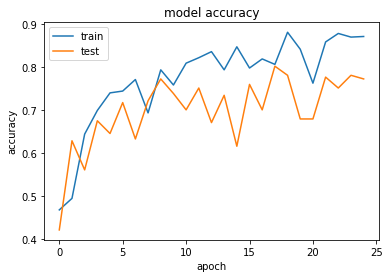

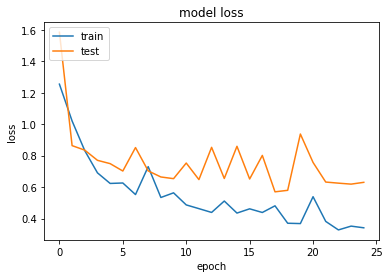

In [33]:
import matplotlib.pyplot as plt

print(H.history.keys())
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('apoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
  predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.68      0.86      0.76        81
      forest       0.86      0.76      0.81        84
     highway       0.82      0.68      0.74        72

    accuracy                           0.77       237
   macro avg       0.79      0.77      0.77       237
weighted avg       0.79      0.77      0.77       237



In [35]:
model.save('nnmodel_scene2')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene2/assets


In [53]:
import cv2
import matplotlib.pyplot as plt
image1='forest_text63.jpg'

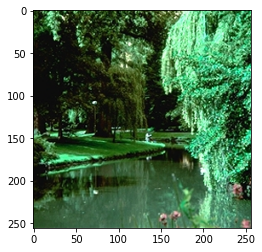

In [54]:
img_array= cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [48]:
 image_testing = Image.open('forest_text63.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [55]:
image_testing = np.expand_dims(image_testing, axis =0)
print(image_testing.shape)

(1, 64, 64, 3)


In [57]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[4.9281283e-03 9.9424464e-01 8.2726398e-04]]
['forest']
